# Leaf Classification
## Using Neural Networks through Keras

__author__ : Najeeb Khan, Yasir Mir, Zafarullah Mahmood

__team__ : artificial_stuPiDity

__institution__ : Jamia Millia Islamia

__email__ : najeeb.khan96@gmail.com

In [2]:
## Importing standard libraries

%pylab inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [3]:
## Importing sklearn libraries

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
## Keras Libraries for Neural Networks

from keras.models import Sequential 
from keras.layers import Dense,Dropout,Activation
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [5]:
## Set figure size to 20x10

from pylab import rcParams
rcParams['figure.figsize'] = 10,10

In [6]:
## Read data from the CSV file

data = pd.read_csv('train.csv')
parent_data = data.copy()    ## Always a good idea to keep a copy of original data
ID = data.pop('id')

In [7]:
## Since the labels are textual, so we encode them categorically

y = data.pop('species')
y = LabelEncoder().fit(y).transform(y)
print(y.shape)

(990,)


In [8]:
## Most of the learning algorithms are prone to feature scaling
## Standardising the data to give zero mean =)

X = StandardScaler().fit(data).transform(data)
print(X.shape)

(990, 192)


In [9]:
## We will be working with categorical crossentropy function
## It is required to further convert the labels into "one-hot" representation

y_cat = to_categorical(y)
print(y_cat.shape)

(990, 99)


In [10]:
## Developing a layered model for Neural Networks
## Input dimensions should be equal to the number of features
## We used softmax layer to predict a uniform probabilistic distribution of outcomes

model = Sequential()
model.add(Dense(1024,input_dim=192))
model.add(Dropout(0.2))
model.add(Activation('sigmoid'))
model.add(Dense(512))
model.add(Dropout(0.3))
model.add(Activation('sigmoid'))
model.add(Dense(99))
model.add(Activation('softmax'))

In [11]:
## Error is measured as categorical crossentropy or multiclass logloss
model.compile(loss='categorical_crossentropy',optimizer='rmsprop')

In [13]:
## Fitting the model on the whole training data
history = model.fit(X,y_cat,batch_size=128,nb_epoch=100,verbose=0)

D:\Program Files\Anaconda3\lib\site-packages\keras\models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


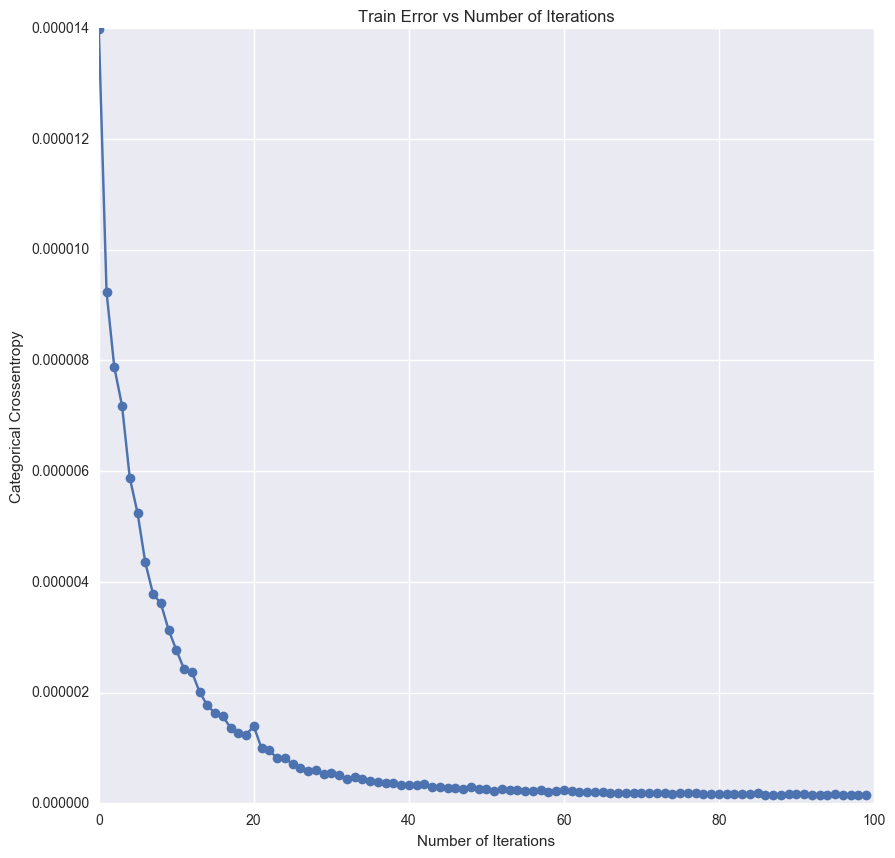

In [14]:
## Plotting the error with the number of iterations
## With each iteration the error reduces smoothly

plt.plot(history.history['loss'],'o-')
plt.xlabel('Number of Iterations')
plt.ylabel('Categorical Crossentropy')
plt.title('Train Error vs Number of Iterations')

In [15]:
test = pd.read_csv('test.csv')

In [16]:
index = test.pop('id')

In [17]:
test = StandardScaler().fit(test).transform(test)

In [18]:
yPred = model.predict_proba(test)

594/594 [==============================] - 0s     


In [19]:
## Converting the test predictions in a dataframe as depicted by sample submission

yPred = pd.DataFrame(yPred,index=index,columns=sort(parent_data.species.unique()))

In [20]:
fp = open('submission_nn_kernel.csv','w')
fp.write(yPred.to_csv())

1310570

`Earlier` we used a 4 layer network but the result came out to be overfitting the test set. We dropped the count of neurones in the network and also restricted the number of layers to 3 so as to keep it simple.
Instead of submitting each test sample as a one hot vector we submitted each samples as a probabilistic distribution over all the possible outcomes. This "may" help reduce the penalty being exercised by the multiclass logloss thus producing low error on the leaderboard! ;)
Any suggestions are welcome!